## Convolution as 'running scalar product'

Given the assumption of locality, stationarity, and compositionality, we can reduct the amount of computation for a matrix-vector multiplication by using a sparse (because local) Toeplitz/diagonal-constant (because stationary) scheme. In this way we simpley end up re-discovering the convolution operator.

We also recall that a scalar product is simply a un-normalised cosine distance, which tells us the alignment of two vectors. More specifically, we compute the magnirude of the orthogonal projection of one vector onto the other, or vice versa.

In [1]:
# TO read the audio file 
import librosa

In [3]:
# my input signal x == x[k], sampling of the real, time continuous, x(t)
x, sampling_rate = librosa.load('res/win_xp_shutdown.wav')

In [4]:
# computing the temporal length of x(t)
T = x.size / sampling_rate
print(
    f'x[k] has {x.size} samples, ',
    f'the sampling rate is {sampling_rate * 1e-3}kHz, ',
    f'x(t) is {T:.1f}s long.'
    )

x[k] has 70641 samples,  the sampling rate is 22.05kHz,  x(t) is 3.2s long.


In [7]:
from res.plot_lib import set_default
import matplotlib.pyplot as plt
import numpy as np

In [8]:
set_default(figsize=(16,8))

In [9]:
# creating x(t) time span
dt = 1 / sampling_rate
t = np.r_[0: T: dt] # same as np.arange(0,T,dt)

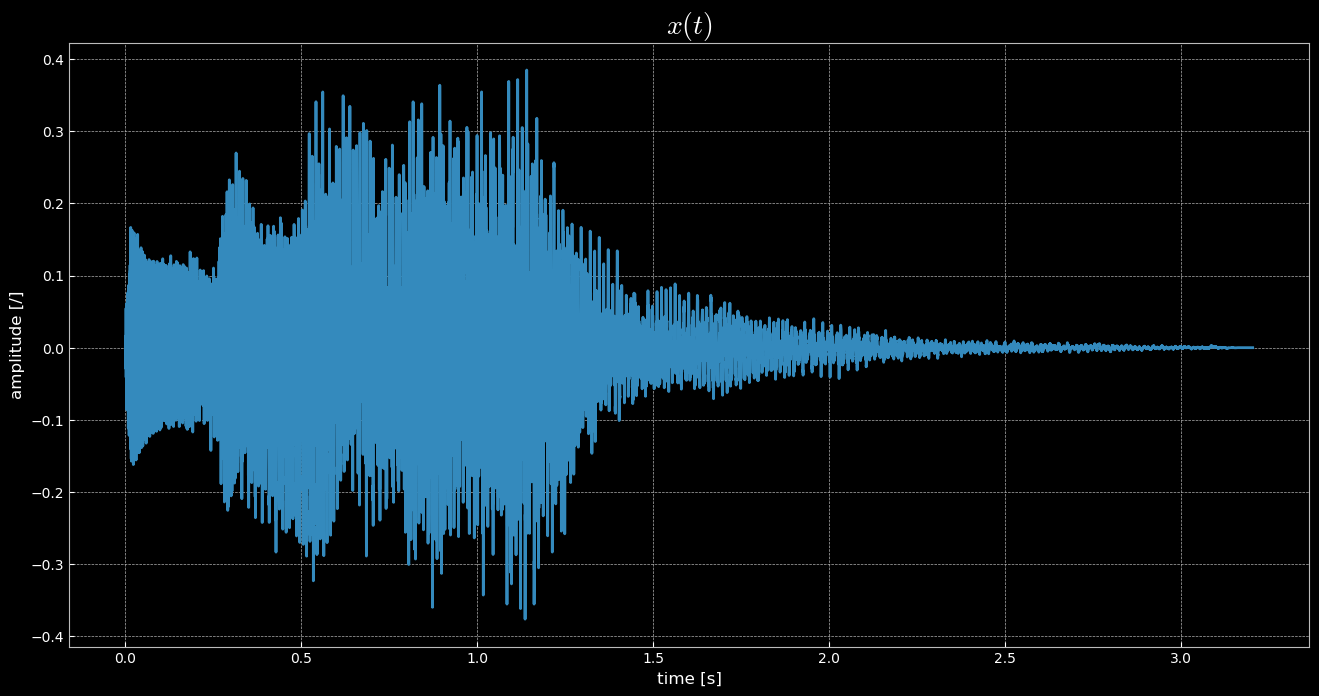

In [10]:
# Visualising x(t)
plt.figure()
plt.plot(t, x)
plt.xlabel('time [s]')
plt.ylabel('amplitude [/]')
plt.title(r"$x(t)$", size = 20)
plt.show()

In [11]:
# importing jupyter utilities for playing audio
from IPython.display import display, Audio

In [12]:
# let's listen to the x(t)
Audio(x, rate=sampling_rate)

In [13]:
# computing the Short-Time Fourier Transform (STFT) and ocnvert the amplitude to dB
X = librosa.stft(x)
X_dB = librosa.amplitude_to_db(np.abs(X))

In [14]:
# importing the spectogram functon
from librosa.display import specshow

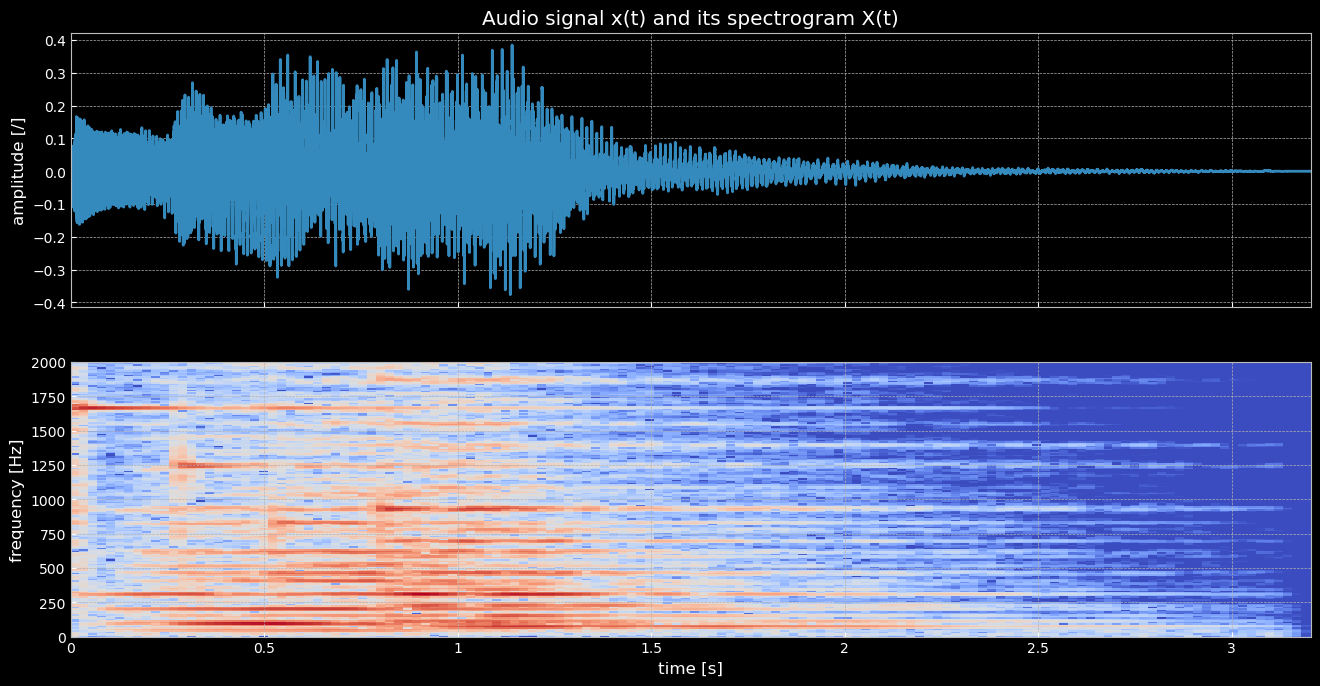

In [15]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t, x)
plt.xlim([0, T])
plt.ylabel('amplitude [/]')
plt.title('Audio signal x(t) and its spectrogram X(t)')
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.subplot(2,1,2)
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.ylim(top=2000)
plt.grid(True)

In [16]:
# Manual Reconstruction of the Melody:
# pick the melody frequencies / notes from the spectogram above
Ab6 = 1661 # Hz
Eb6 = 1244
Ab5 = 830
Bb5 = 932
TT = .4 # s
tt = np.r_[0: TT: dt]

# generating tones
A = {
    'a^(1)': np.sin(2 * np.pi * Ab6 * tt),
    'a^(2)': np.sin(2 * np.pi * Eb6 * tt),
    'a^(3)': np.sin(2 * np.pi * Ab5 * tt),
    'a^(4)': np.sin(2 * np.pi * Bb5 * tt),
}

# concatenating them
xx = np.concatenate([a[1] for a in A.items()])

In [17]:
# listening to the re-constructed audio
display(Audio(x, rate = sampling_rate))
display(Audio(xx, rate = sampling_rate))


In [18]:
# computing the STFT of the reconstruction
XX = librosa.stft(xx)
XX_dB = librosa.amplitude_to_db(np.abs(XX))

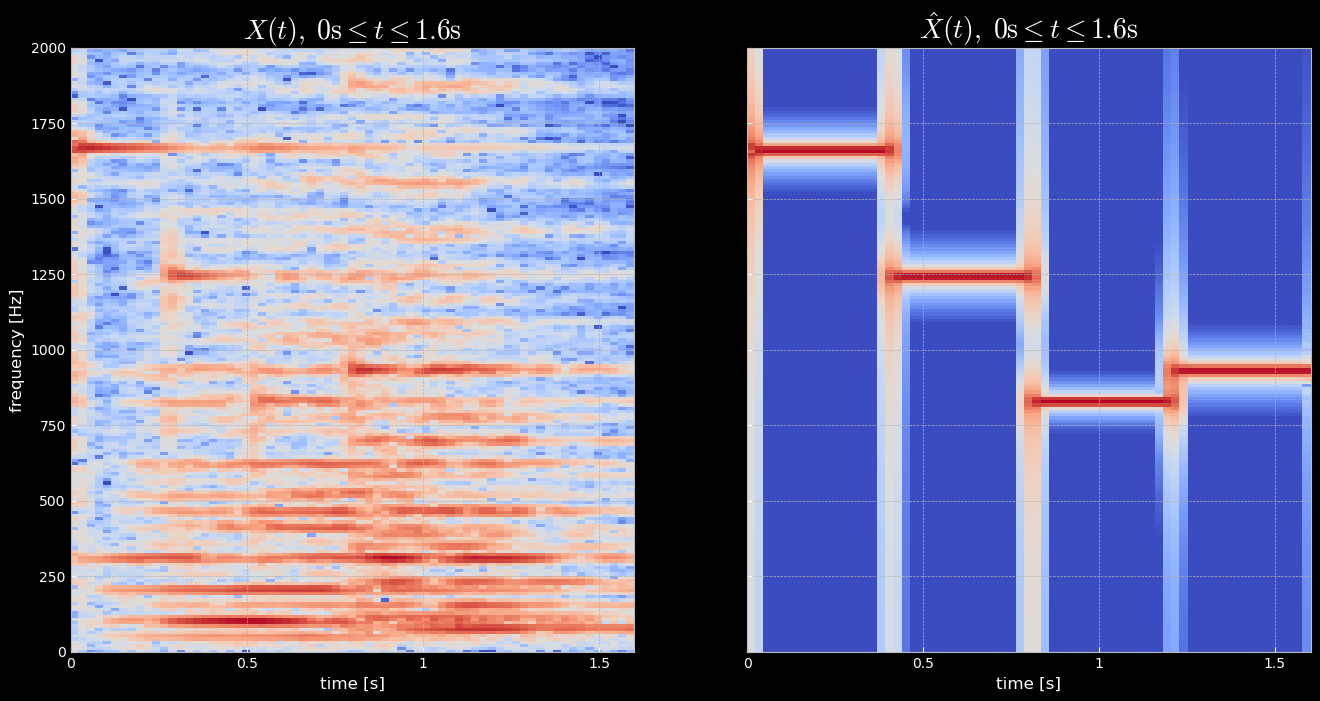

In [19]:
# ... and plot both X(t) and XX(t)
plt.figure()
t_string = r'$0\mathrm{s} \leq t \leq 1.6\mathrm{s}$'

plt.subplot(1,2,1)
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.ylim(ymax=2000)
plt.ylabel('frequency [Hz]')
plt.xlabel('time [s]')
plt.grid(True)
plt.xlim(right=1.6)
plt.title(r'$X(t),\; $' + t_string, size=20)

plt.subplot(1,2,2)
specshow(XX_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.xlabel('time [s]')
plt.ylim(top=2000)
plt.ylabel('')
plt.grid(True)
plt.title(r'$\hat X(t),\; $' + t_string, size=20);

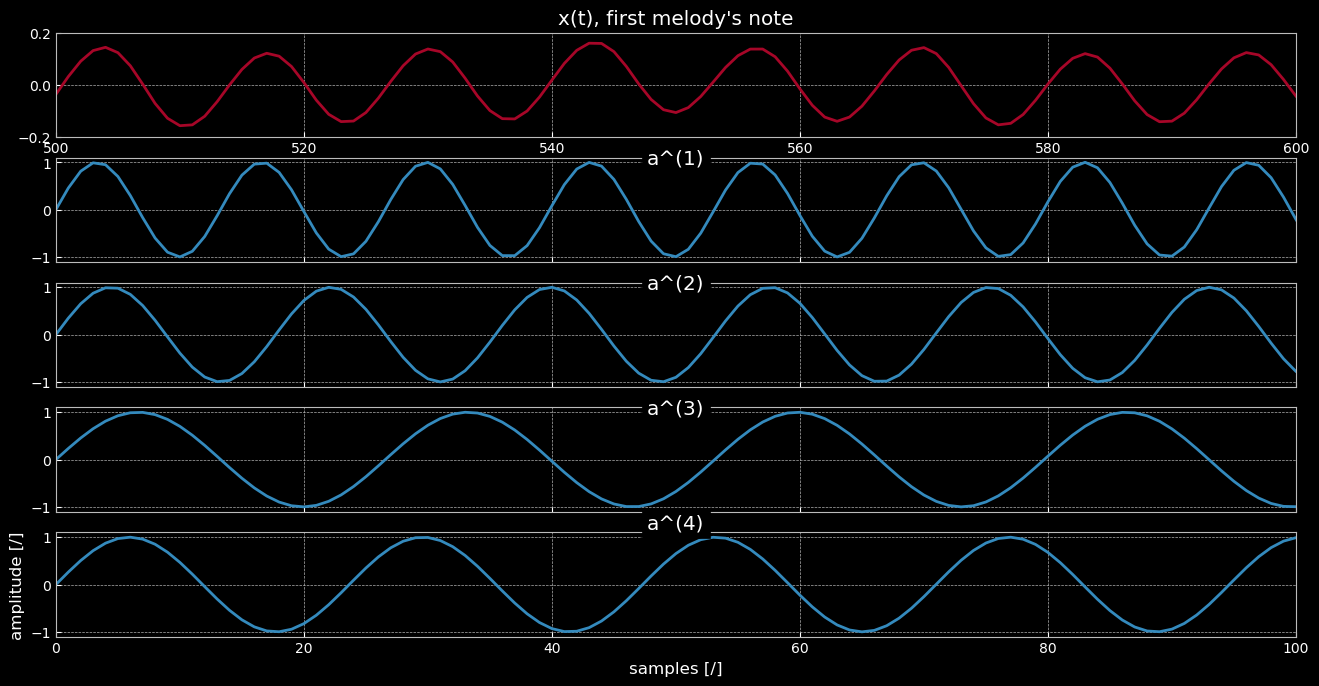

In [20]:

# What about in the time domain? Let's plot x(t) and a^(i)(t)
plt.figure()
plt.subplot(5, 1, 1)
plt.title('x(t), first melody\'s note')
plt.plot(x, 'C1')
plt.xlim([500, 600])
plt.ylim([-.2, .2])
i = 2
for a in A.items():
    plt.subplot(5, 1, i)
    i += 1
    plt.plot(a[1])
    plt.xlim([0, 100])
    plt.title(a[0], verticalalignment='top', backgroundcolor='black')
    if i < 6: 
        plt.setp(plt.gca().get_xticklabels(), visible=False)

plt.ylabel('amplitude [/]')
plt.xlabel('samples [/]');

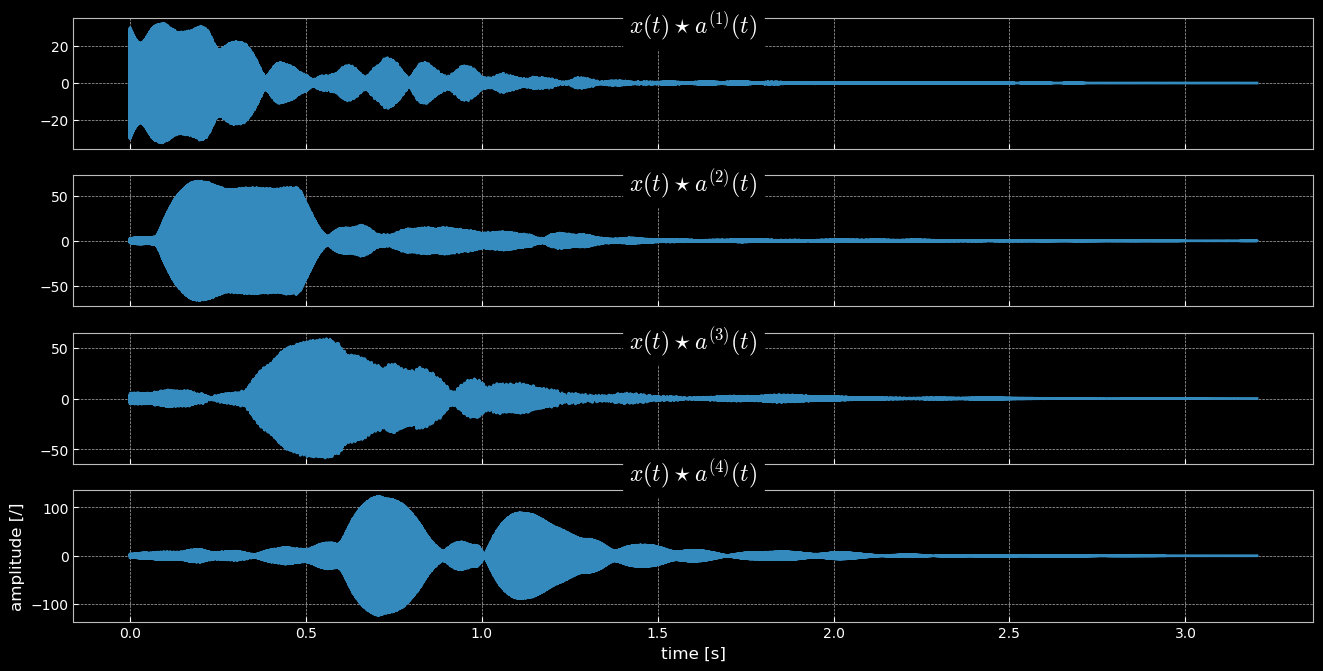

In [21]:
# Finally, let's convolve each tune a^(i) with x(t)
plt.figure()
convs = list()
n = 1
for a in A.items():
    plt.subplot(4, 1, n)
    plt.title(rf'$x(t) \star a^{{({n})}}(t)$', backgroundcolor='black', verticalalignment='top', size=17)
    n += 1
    convs.append(np.convolve(x, a[1], mode='same'))
    plt.plot(t, convs[-1])
    if n < 5: 
        plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.ylabel('amplitude [/]')
plt.xlabel('time [s]');

In [22]:
# Finally, let's listen to these convolutions!
for c in convs:
    display(Audio(c, rate=sampling_rate))